In [1]:
# Import packages.
import numpy as np
import pandas as pd

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

Data fields
track_name: Name of the song
artist(s)_name: Name of the artist(s) of the song
artist_count: Number of artists contributing to the song
released_year: Year when the song was released
released_month: Month when the song was released
released_day: Day of the month when the song was released
in_spotify_playlists: Number of Spotify playlists the song is included in
in_spotify_charts: Presence and rank of the song on Spotify charts
streams: Total number of streams on Spotify
in_apple_playlists: Number of Apple Music playlists the song is included in
in_apple_charts: Presence and rank of the song on Apple Music charts
in_deezer_playlists: Number of Deezer playlists the song is included in
in_deezer_charts: Presence and rank of the song on Deezer charts
in_shazam_charts: Presence and rank of the song on Shazam charts
bpm: Beats per minute, a measure of song tempo
key: Key of the song
mode: Mode of the song (major or minor)
danceability_%: Percentage indicating how suitable the song is for dancing
valence_%: Positivity of the song's musical content
energy_%: Perceived energy level of the song
acousticness_%: Amount of acoustic sound in the song
instrumentalness_%: Amount of instrumental content in the song
liveness_%: Presence of live performance elements
speechiness_%: Amount of spoken words in the song

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.0f}'.format

In [3]:
# Import and explore data
df = pd.read_csv('./spotify-2023.csv', encoding='latin')
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [4]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953
mean,2,2018,6,14,5200,12,68,52,3,123,67,51,64,27,2,18,10
std,1,11,4,9,7898,20,86,51,6,28,15,23,17,26,8,14,10
min,1,1930,1,1,31,0,0,0,0,65,23,4,9,0,0,3,2
25%,1,2020,3,6,875,0,13,7,0,100,57,32,53,6,0,10,4
50%,1,2022,6,13,2224,3,34,38,0,121,69,51,66,18,0,12,6
75%,2,2022,9,22,5542,16,88,87,2,140,78,70,77,43,0,24,11
max,8,2023,12,31,52898,147,672,275,58,206,96,97,97,97,91,97,64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
# copy the dataset
spotify = df.copy()
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [8]:
spot_subset = spotify[['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'bpm','key', 'mode']]

# Find and drop duplicated songs
duplicates = spotify[spot_subset.duplicated()]
spotify = spotify.drop(duplicates.index)
spotify.reset_index(drop=True, inplace=True)

In [60]:
# Find the numeric values in dataset
numeric_columns = ['artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm','danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','released_year']

In [11]:
# Clean the data
spotify[numeric_columns] = spotify[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [25]:
# Find the top 10 streamed songs
top10_streamed_songs = spotify[['artist(s)_name','track_name','streams']].nlargest(10,'streams')
top10_streamed_songs

,artist(s)_name,track_name,streams
55,The Weeknd,Blinding Lights,3703895074
179,Ed Sheeran,Shape of You,3562543890
86,Lewis Capaldi,Someone You Loved,2887241814
620,Tones and I,Dance Monkey,2864791672
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808096550
162,"Drake, WizKid, Kyla",One Dance,2713922350
84,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),2665343922
140,Imagine Dragons,Believer,2594040133
725,"The Chainsmokers, Halsey",Closer,2591224264
48,"The Weeknd, Daft Punk",Starboy,2565529693


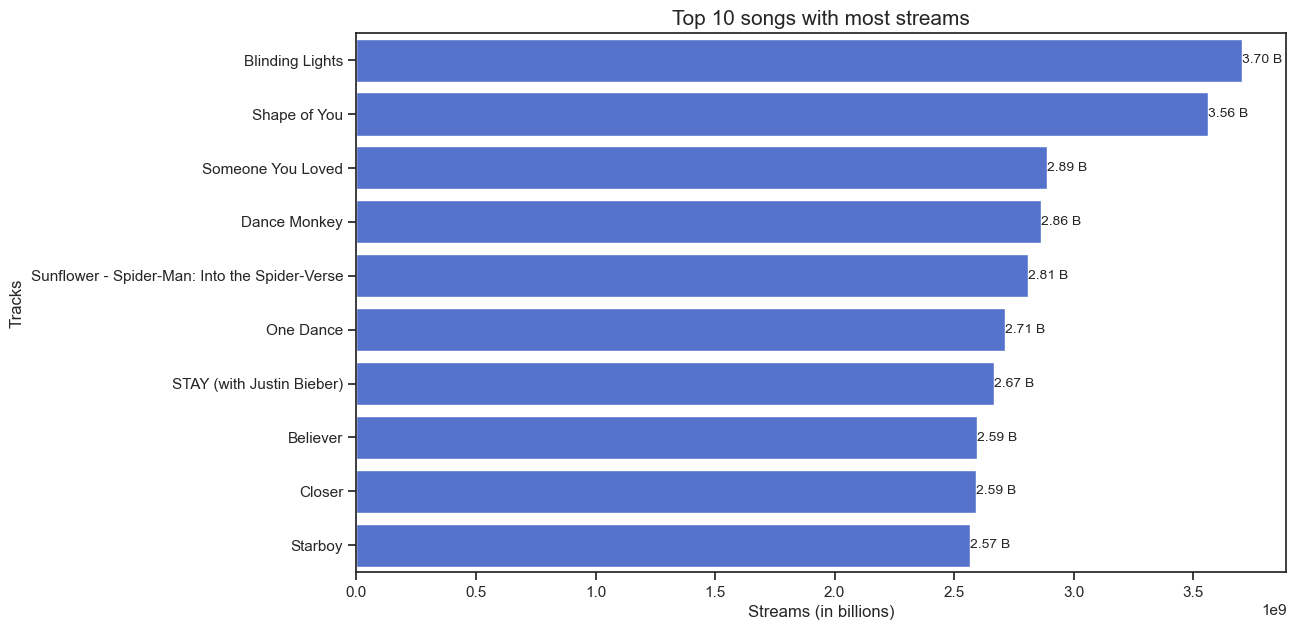

In [55]:
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(top10_streamed_songs, x="streams", y="track_name", color='royalblue')
ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: f'{x / 10**9:.2f} B')
ax.set_title('Top 10 songs with most streams', fontsize =15)
ax.set(xlabel='Streams (in billions)',ylabel= 'Tracks')
plt.show()

In [14]:
# Find the top 10 streamed artist
top10_artists = spotify.groupby('artist(s)_name')[['streams']].sum().nlargest(10,'streams')
top10_artists

,streams
artist(s)_name,
The Weeknd,14185552870
Taylor Swift,14053658300
Ed Sheeran,13908947204
Harry Styles,11608645649
Bad Bunny,9997799607
Olivia Rodrigo,7442148916
Eminem,6183805596
Bruno Mars,5846920599
Arctic Monkeys,5569806731


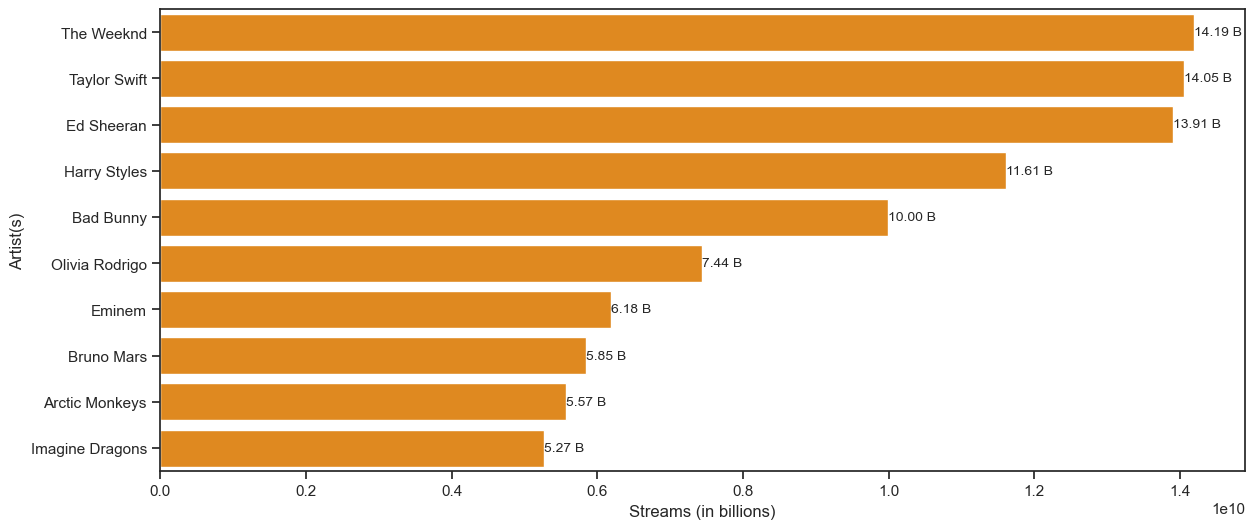

In [43]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(top10_artists, x="streams", y=top10_artists.index, color='darkorange')
ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: f'{x / 10**9:.2f} B')
ax.set_title('Top 10 Artist with most streams')
ax.set(xlabel='Streams (in billions)',ylabel= 'Artist(s)')
plt.show()

In [45]:
total_songs = len(spotify)
artist_songs_count = spotify['artist(s)_name'].value_counts().reset_index()
artist_songs_count.columns = ['artist(s)_name', 'count']
artist_songs_count['percentage_of_total'] = (artist_songs_count['count'] / total_songs) * 100
top10_artists_by_songs_count = artist_songs_count.nlargest(10, 'percentage_of_total')
top10_artists_by_songs_count

,artist(s)_name,count,percentage_of_total
0,Taylor Swift,34,4
1,The Weeknd,22,2
2,Bad Bunny,19,2
3,SZA,19,2
4,Harry Styles,17,2
5,Kendrick Lamar,12,1
6,Morgan Wallen,11,1
7,Ed Sheeran,9,1
8,Feid,8,1
9,"Drake, 21 Savage",8,1


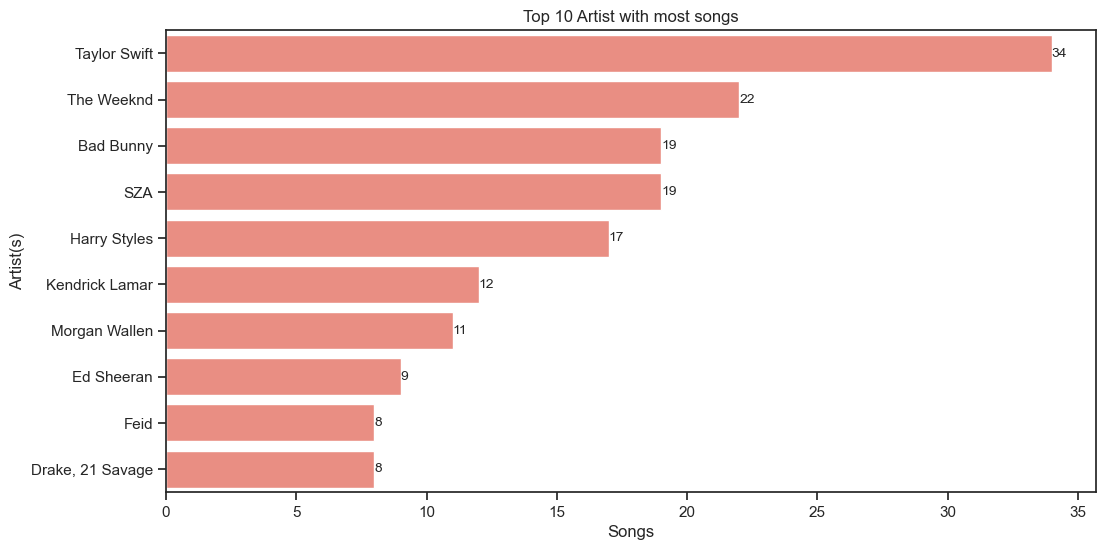

In [154]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(top10_artists_by_songs_count, x="count", y='artist(s)_name', color='salmon')
ax.bar_label(ax.containers[0], fontsize=10);
ax.set(xlabel='Songs',ylabel= 'Artist(s)')
ax.set_title('Top 10 Artist with most songs')
plt.show()

In [82]:
# Find the top 10 streamed artist
monthly_streams = spotify[spotify['released_year'] >= 2019].groupby('released_month')[['streams']].mean()
monthly_streams

,streams
released_month,
1,329732844
2,277231522
3,392793145
4,342582807
5,340693175
6,344651585
7,445238220
8,483708979
9,524599582


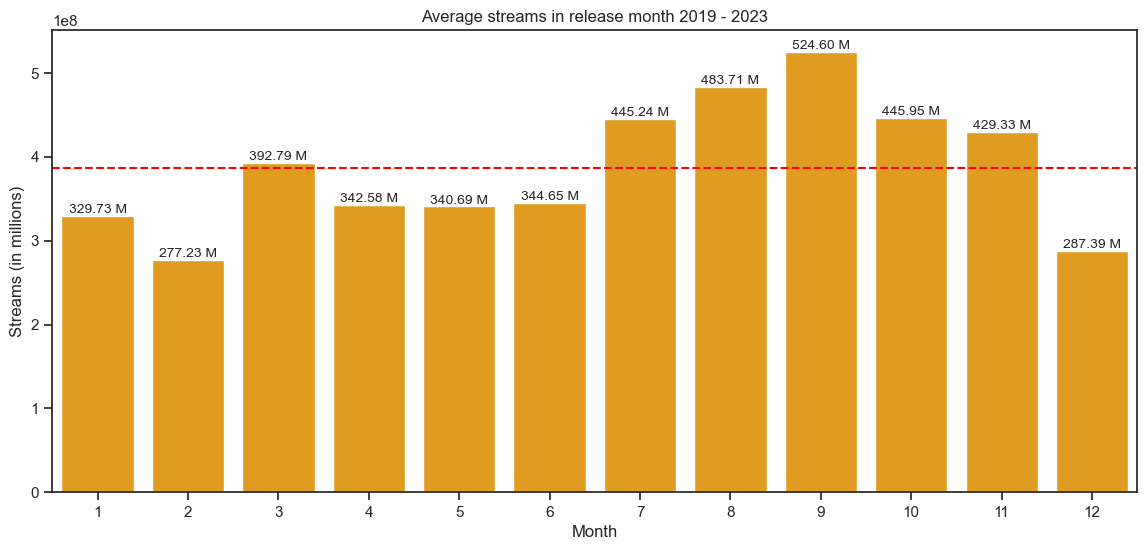

In [95]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(monthly_streams, x=monthly_streams.index, y="streams", color='orange', estimator='sum')
ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: f'{x / 10**6:.2f} M')
plt.axhline(np.mean(monthly_streams['streams']), color='red', linestyle='--', label='Average')
ax.set_title('Average streams in release month 2019 - 2023')
ax.set(xlabel='Month',ylabel= 'Streams (in millions)')
plt.show()

Songs released between July - November appears to have higher streams than the other months.

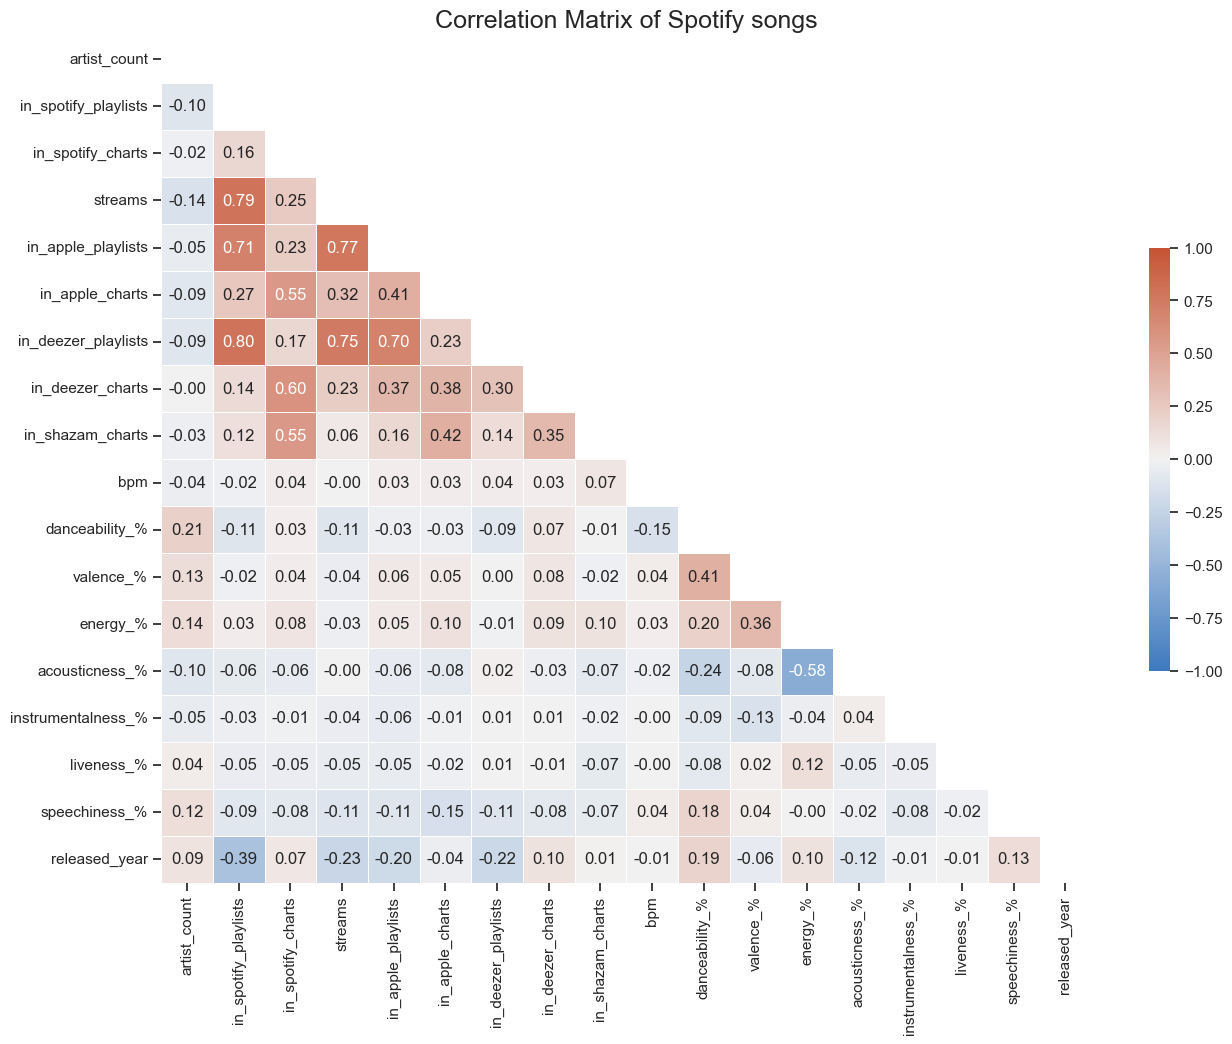

In [152]:
# Generate a correlation matrix
correlation_matrix = spotify[numeric_columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))
# colormap
sns.set_palette(sns.color_palette(color))
cmap = sns.diverging_palette(250, 20, l=50, s=80, as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True, center=0,
             linewidths=.5, cbar_kws={"shrink": .5}, fmt=".2f")
ax.set_title('Correlation Matrix of Spotify songs', fontsize = 18)
plt.show()

In [90]:
# Find metrics with high correlation
c = correlation_matrix.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
hi_corr = so[(so >= 0.6) & (so < 1)].index
hi_corr_list = []
for i in hi_corr:
    for j in i:
        if j not in hi_corr_list:
            hi_corr_list.append(j)
        else:
            continue
hi_corr_list

['in_deezer_charts',
 'in_spotify_charts',
 'in_apple_playlists',
 'in_deezer_playlists',
 'in_spotify_playlists',
 'streams']

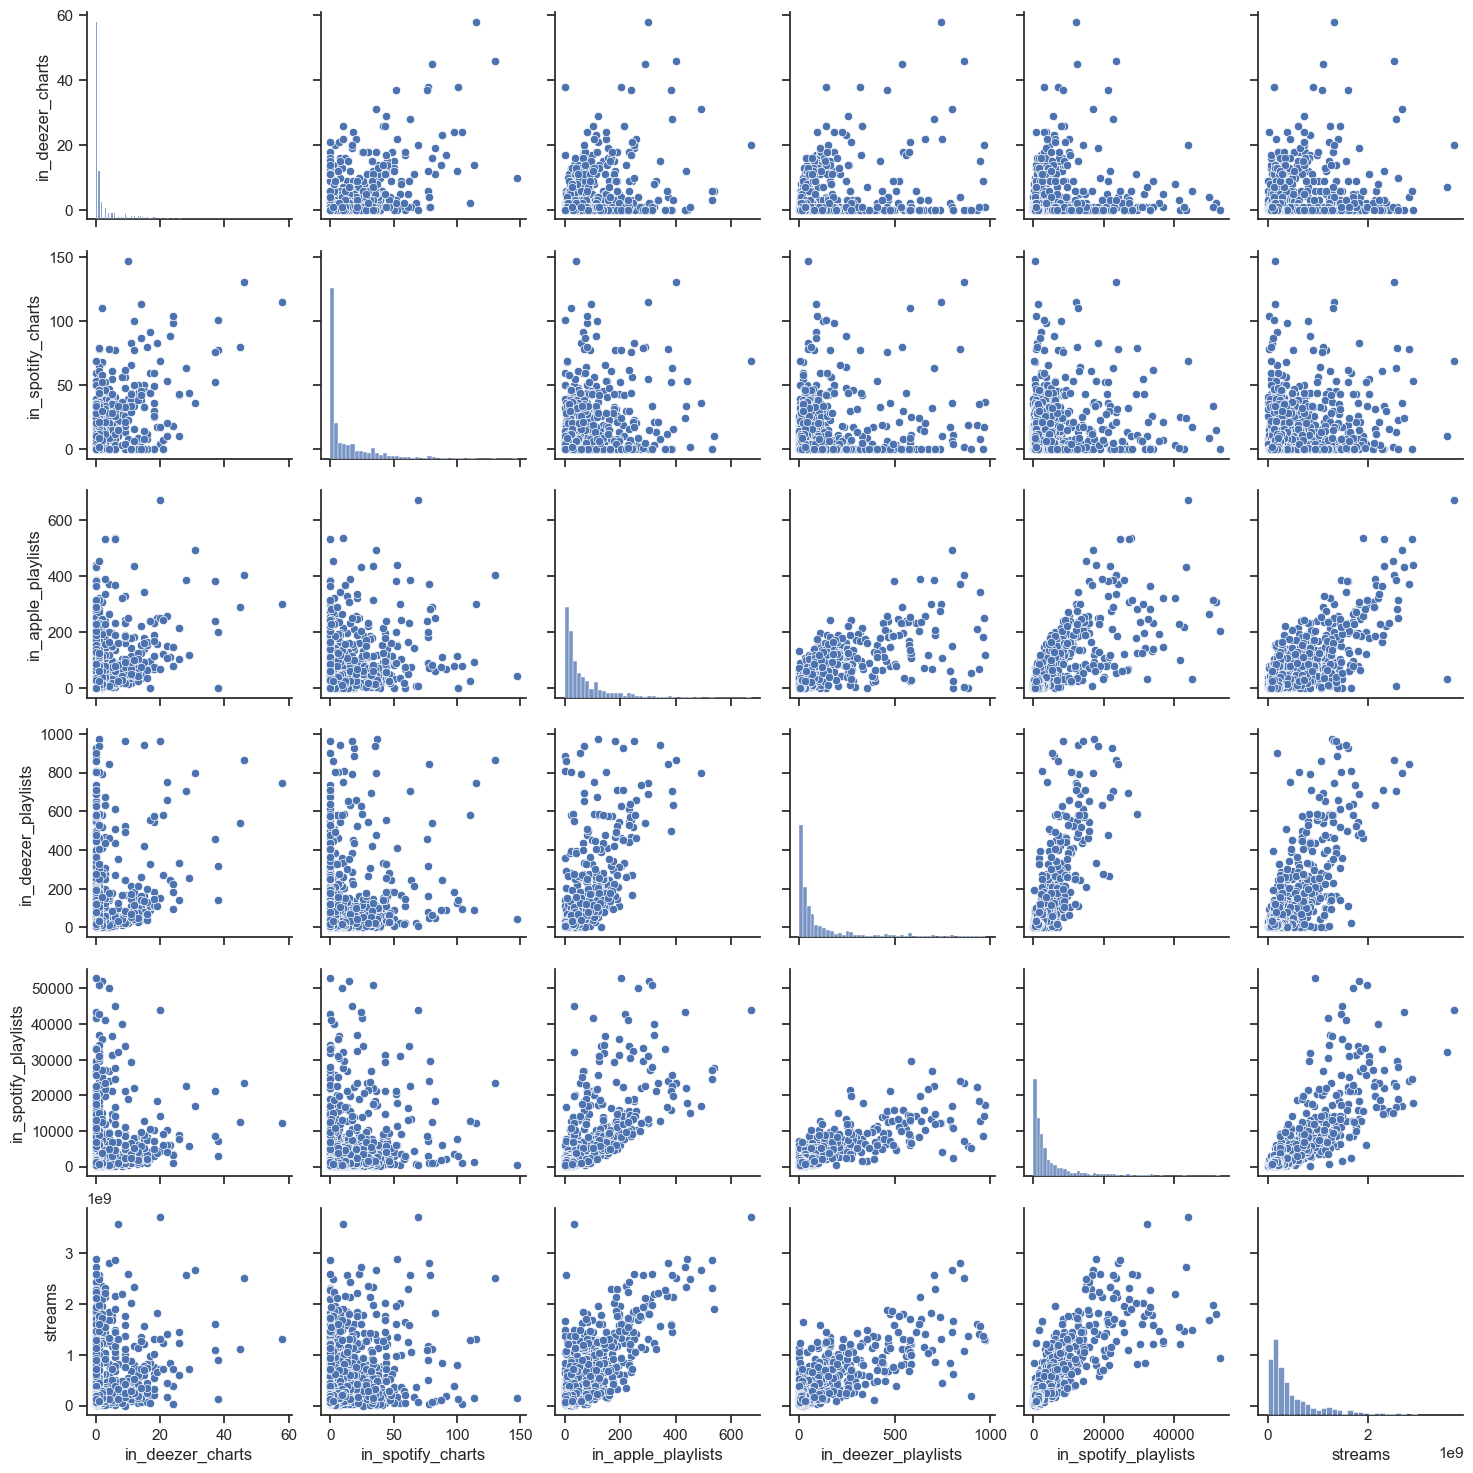

In [107]:
sns.set_theme(style="ticks")
sns.pairplot(spotify[hi_corr_list])
ax.set_title('Scatter Matrix of with high correlation metrics', fontsize = 18)
plt.show()

Based on the heatmap and scatter matrix abovve, we can see that streams of songs appears to be highly correlated to the numbers of playlists and charts they are in. Streams of the songs and the number of playlists they are in have a positive relationship.